In [93]:
import pandas as pd
import numpy as np
import math
import os
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns            # visualization tool
import matplotlib.cm as cm       #

In [94]:
def zero_crossing(temp,threshold):
    zc = 0
    for i in range(len(temp)-1):
        if((temp[i]*temp[i+1]) < 0 and abs(temp[i]-temp[i+1]) >= threshold):
            zc += 1
    return zc

In [95]:
def process_one_csv(file_name,k):
    data = pd.read_csv('/home/amaya/emp/Realtime-Sign-Language-Translation-to-Speech-DNN/all/User'+str(k)+'/'+file_name)
    global classes
    
    class_ = file_name[0:len(file_name)-14]
    
    # print(data.head(2))

    columns = list(data.columns)[1:]
    # features = ['MAV','RMS','VAR','SSI','MAX','MIN']
    
    vector = []
    # global out_columns
    
    for item in columns:
        temp = list(data[item])
        # calculating MAV ***
        # out_columns.append(item+features[0])
        abs_val = list(map(abs,temp))
        vector.append(np.mean(abs_val))

        # calculating RMS ***
        # out_columns.append(item+features[1])
        vector.append(np.sqrt(np.mean(np.array(temp)**2)))

        # calculate variance ***
        # out_columns.append(item+features[2])
        x_mean = np.mean(temp)
        dif = temp - x_mean
        vector.append(np.mean(np.array(dif)**2))

        # calculating ssi ***
        # out_columns.append(item+features[3])
        vector.append(np.sum(np.array(temp)**2))

        # calculating max ***
        # out_columns.append(item+features[4])
        vector.append(max(temp))

        # calculating min ***
        # out_columns.append(item+features[5])
        vector.append(min(temp))
        
        # calculating zero crossing
        if((item[0] == 'E') or (item[0] == 'G')):
            vector.append(zero_crossing(temp,1))
        elif(item[0] == 'A'):
            vector.append(zero_crossing(temp,0.15))
        
    if class_ in classes:
        vector.append(classes.index(class_))
    else:
        classes.append(class_)
        vector.append(classes.index(class_))
        
    return vector



In [96]:
all_features = ['EMG0LMAV', 'EMG0LRMS', 'EMG0LVAR', 'EMG0LSSI', 'EMG0LMAX', 'EMG0LMIN','EMG0ZC', 'EMG1LMAV', 'EMG1LRMS', 'EMG1LVAR', 'EMG1LSSI', 'EMG1LMAX', 'EMG1LMIN','EMG1ZC', 'EMG2LMAV', 'EMG2LRMS', 'EMG2LVAR', 'EMG2LSSI', 'EMG2LMAX', 'EMG2LMIN', 'EMG2ZC','EMG3LMAV', 'EMG3LRMS', 'EMG3LVAR', 'EMG3LSSI', 'EMG3LMAX', 'EMG3LMIN', 'EMG3ZC','EMG4LMAV', 'EMG4LRMS', 'EMG4LVAR', 'EMG4LSSI', 'EMG4LMAX', 'EMG4LMIN', 'EMG4ZC','EMG5LMAV', 'EMG5LRMS', 'EMG5LVAR', 'EMG5LSSI', 'EMG5LMAX', 'EMG5LMIN', 'EMG5ZC','EMG6LMAV','EMG6LRMS', 'EMG6LVAR', 'EMG6LSSI', 'EMG6LMAX', 'EMG6LMIN', 'EMG6ZC','EMG7LMAV', 'EMG7LRMS', 'EMG7LVAR', 'EMG7LSSI', 'EMG7LMAX', 'EMG7LMIN', 'EMG7ZC','AXLMAV', 'AXLRMS', 'AXLVAR', 'AXLSSI', 'AXLMAX', 'AXLMIN', 'AXLZC','AYLMAV', 'AYLRMS', 'AYLVAR', 'AYLSSI', 'AYLMAX', 'AYLMIN', 'AYLZC','AZLMAV', 'AZLRMS', 'AZLVAR', 'AZLSSI', 'AZLMAX', 'AZLMIN', 'AZLZC','GXLMAV', 'GXLRMS', 'GXLVAR', 'GXLSSI', 'GXLMAX', 'GXLMIN', 'GXLZC','GYLMAV', 'GYLRMS', 'GYLVAR', 'GYLSSI', 'GYLMAX', 'GYLMIN', 'GYLZC','GZLMAV', 'GZLRMS', 'GZLVAR', 'GZLSSI', 'GZLMAX', 'GZLMIN', 'GZLZC','ORLMAV', 'ORLRMS', 'ORLVAR', 'ORLSSI', 'ORLMAX', 'ORLMIN', 'OPLMAV', 'OPLRMS', 'OPLVAR', 'OPLSSI', 'OPLMAX', 'OPLMIN', 'OYLMAV', 'OYLRMS', 'OYLVAR', 'OYLSSI', 'OYLMAX', 'OYLMIN', 'EMG0RMAV', 'EMG0RRMS', 'EMG0RVAR', 'EMG0RSSI', 'EMG0RMAX', 'EMG0RMIN', 'EMG0RZC', 'EMG1RMAV', 'EMG1RRMS', 'EMG1RVAR', 'EMG1RSSI', 'EMG1RMAX', 'EMG1RMIN','EMG1RZC', 'EMG2RMAV', 'EMG2RRMS', 'EMG2RVAR', 'EMG2RSSI', 'EMG2RMAX', 'EMG2RMIN','EMG2RZC', 'EMG3RMAV', 'EMG3RRMS', 'EMG3RVAR', 'EMG3RSSI', 'EMG3RMAX', 'EMG3RMIN','EMG3RZC', 'EMG4RMAV', 'EMG4RRMS', 'EMG4RVAR', 'EMG4RSSI', 'EMG4RMAX', 'EMG4RMIN','EMG4RZC', 'EMG5RMAV', 'EMG5RRMS', 'EMG5RVAR', 'EMG5RSSI', 'EMG5RMAX', 'EMG5RMIN','EMG5RZC', 'EMG6RMAV', 'EMG6RRMS', 'EMG6RVAR', 'EMG6RSSI', 'EMG6RMAX', 'EMG6RMIN','EMG6RZC', 'EMG7RMAV', 'EMG7RRMS', 'EMG7RVAR', 'EMG7RSSI', 'EMG7RMAX', 'EMG7RMIN','EMG7RZC', 'AXRMAV', 'AXRRMS', 'AXRVAR', 'AXRSSI', 'AXRMAX', 'AXRMIN','AXRZC', 'AYRMAV', 'AYRRMS', 'AYRVAR', 'AYRSSI', 'AYRMAX', 'AYRMIN','AYRZC', 'AZRMAV', 'AZRRMS', 'AZRVAR', 'AZRSSI', 'AZRMAX', 'AZRMIN','AZRZC', 'GXRMAV', 'GXRRMS', 'GXRVAR', 'GXRSSI', 'GXRMAX', 'GXRMIN','GXRZC', 'GYRMAV', 'GYRRMS', 'GYRVAR', 'GYRSSI', 'GYRMAX', 'GYRMIN','GYRZC', 'GZRMAV', 'GZRRMS', 'GZRVAR', 'GZRSSI', 'GZRMAX', 'GZRMIN','GZRZC', 'ORRMAV', 'ORRRMS', 'ORRVAR', 'ORRSSI', 'ORRMAX', 'ORRMIN', 'OPRMAV', 'OPRRMS', 'OPRVAR', 'OPRSSI', 'OPRMAX', 'OPRMIN', 'OYRMAV', 'OYRRMS', 'OYRVAR', 'OYRSSI', 'OYRMAX', 'OYRMIN','CLASS']
# 233 columns
selected_features = ['ORLMAX', 'OPLMAV', 'OPLRMS', 'OPLVAR', 'OPLSSI', 'OPLMIN', 'OYLMAV','OYLVAR', 'OYLMIN', 'EMG1RVAR', 'EMG1RSSI', 'EMG2RVAR', 'EMG3RMAV','EMG3RVAR', 'EMG6RMAV', 'EMG6RRMS', 'EMG7RMAV', 'AXRMAV', 'AXRRMS','AXRVAR', 'AXRSSI', 'AXRMAX', 'AYRMAV', 'AYRVAR', 'AZRMAV', 'AZRRMS','AZRVAR', 'AZRSSI', 'AZRMIN', 'GXRMAV', 'GXRRMS', 'GXRVAR', 'GXRSSI','GZRMAV', 'GZRMAX', 'GZRMIN', 'ORRMAV', 'ORRVAR', 'ORRMIN', 'OPRMAV','OPRRMS', 'OPRVAR', 'OPRSSI', 'OPRMIN', 'OYRVAR', 'OYRSSI']
# 46 features selected from random forest
ocolumns = ['ORLMAX', 'OPLMAV', 'OPLRMS', 'OPLVAR', 'OPLSSI', 'OPLMIN', 'OYLMAV','OYLVAR', 'OYLMIN', 'EMG1RVAR', 'EMG1RSSI', 'EMG2RVAR', 'EMG3RMAV','EMG3RVAR', 'EMG6RMAV', 'EMG6RRMS', 'EMG7RMAV', 'AXRMAV', 'AXRRMS','AXRVAR', 'AXRSSI', 'AXRMAX', 'AYRMAV', 'AYRVAR', 'AZRMAV', 'AZRRMS','AZRVAR', 'AZRSSI', 'AZRMIN', 'GXRMAV', 'GXRRMS', 'GXRVAR', 'GXRSSI','GZRMAV', 'GZRMAX', 'GZRMIN', 'ORRMAV', 'ORRVAR', 'ORRMIN', 'OPRMAV','OPRRMS', 'OPRVAR', 'OPRSSI', 'OPRMIN', 'OYRVAR', 'OYRSSI', 'CLASS']
# 47 columns
output = []
classes=[]
# print(len(out_columns))

# process_one_csv(files[0])
for k in range(1,11):
    if(k!=5):
        files = os.listdir('/home/amaya/emp/Realtime-Sign-Language-Translation-to-Speech-DNN/all/User'+str(k)+'/')
    else:
        continue
    for file in files:
        if(file[-1] == 'v'):      # to avoid _DS_STORE files and any other hidden files
            output.append(process_one_csv(file,k))
            
initial_df = pd.DataFrame(output,columns = all_features)
processed = initial_df[ocolumns]
processed.shape

(550, 47)

In [97]:
# feature scaling of data
scaler = preprocessing.MinMaxScaler()   # since the data set is not gaussian
scaled_df = scaler.fit_transform(processed[ocolumns[:len(ocolumns)-1]])
X = pd.DataFrame(scaled_df, columns = ocolumns[:len(ocolumns)-1])
y = processed['CLASS']

In [179]:
# splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)
print(X_train.shape,'\n',y_train.shape)

# for conv layer
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)


(440, 46) 
 (440,)


In [261]:

# setting up the layers
model = keras.Sequential([
    keras.layers.Conv1D(5,3,activation='relu',data_format='channels_last',input_shape=(46,1)),
    keras.layers.MaxPooling1D(2),
    #keras.layers.Conv1D(10,10,activation='relu'),
    #keras.layers.MaxPooling1D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(30,activation = 'relu'),
    #keras.layers.Dense(30,activation = 'relu'), # 450 for 232 features
    keras.layers.Dropout(0.2),
    keras.layers.Dense(20,activation = 'softmax')
])
model.summary()
# compile the model
#model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])



Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_99 (Conv1D)           (None, 44, 5)             20        
_________________________________________________________________
max_pooling1d_60 (MaxPooling (None, 22, 5)             0         
_________________________________________________________________
flatten_66 (Flatten)         (None, 110)               0         
_________________________________________________________________
dense_278 (Dense)            (None, 30)                3330      
_________________________________________________________________
dropout_95 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_279 (Dense)            (None, 20)                620       
Total params: 3,970
Trainable params: 3,970
Non-trainable params: 0
___________________________________________________

In [265]:

# load a model : dont do when you have a model already
model = keras.models.load_model('3.h5')

# compile the model
#model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.00005), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])



(440,)
Train on 440 samples, validate on 110 samples
Epoch 1/200
440/440 - 2s - loss: 0.2458 - acc: 0.9364 - val_loss: 0.8390 - val_acc: 0.8182
Epoch 2/200
440/440 - 0s - loss: 0.2291 - acc: 0.9318 - val_loss: 0.8376 - val_acc: 0.8091
Epoch 3/200
440/440 - 0s - loss: 0.2161 - acc: 0.9295 - val_loss: 0.8396 - val_acc: 0.8091
Epoch 4/200
440/440 - 0s - loss: 0.2018 - acc: 0.9364 - val_loss: 0.8410 - val_acc: 0.8091
Epoch 5/200
440/440 - 0s - loss: 0.2230 - acc: 0.9250 - val_loss: 0.8424 - val_acc: 0.8091
Epoch 6/200
440/440 - 0s - loss: 0.2472 - acc: 0.9205 - val_loss: 0.8421 - val_acc: 0.8091
Epoch 7/200
440/440 - 0s - loss: 0.2569 - acc: 0.9091 - val_loss: 0.8399 - val_acc: 0.8091
Epoch 8/200
440/440 - 0s - loss: 0.2540 - acc: 0.9205 - val_loss: 0.8397 - val_acc: 0.8182
Epoch 9/200
440/440 - 0s - loss: 0.2421 - acc: 0.9250 - val_loss: 0.8353 - val_acc: 0.8182
Epoch 10/200
440/440 - 0s - loss: 0.2261 - acc: 0.9227 - val_loss: 0.8354 - val_acc: 0.8182
Epoch 11/200
440/440 - 0s - loss: 0.

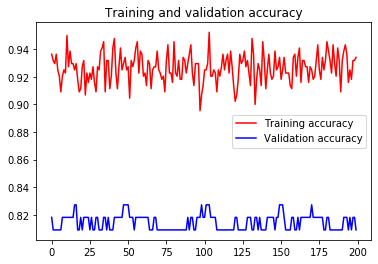

<Figure size 432x288 with 0 Axes>

In [266]:
# Training the model

print(y_train.shape)
history=model.fit(X_train,y_train,epochs = 200,validation_data=(X_test,y_test),verbose=2)
model.save('4.h5')

# Plot data
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [215]:
# evaluate accuracy
test_loss,test_acc = model.evaluate(X_test,y_test)
print(test_acc)

110/110 [==============================] - 0s 82us/sample - loss: 2.4581 - acc: 0.7000
0.7


In [10]:
# predict
predictions = model.predict(X_test)
for i in range(20):
    print(np.argmax(predictions[i]))

17
12
7
9
11
6
2
18
18
19
17
3
17
10
4
7
7
19
10
3


In [11]:
for i in range(20):
    print(list(y_test)[i])

4
12
7
9
9
6
2
12
18
19
17
14
17
10
4
7
7
19
10
8
